# Pandas

Pandas är ett Python-bibliotek för att hantera strukturerad data (t.ex. excel/csv-filer). Det erbjuder verktyg för statistik, bekväma funktioner för att importera data och möjligheten att filtrera och extrahera information. Huvudstrukturen i Pandas kallas "DataFrame". Med en DataFrame kan du lagra och manipulera tabulära data, liknande ett Excel-ark. Den fungerar på sätt som liknar en generalisering av dictionaries för att associera fler än 2 objekt, och på andra sätt liknar den en 2D numpy-array.

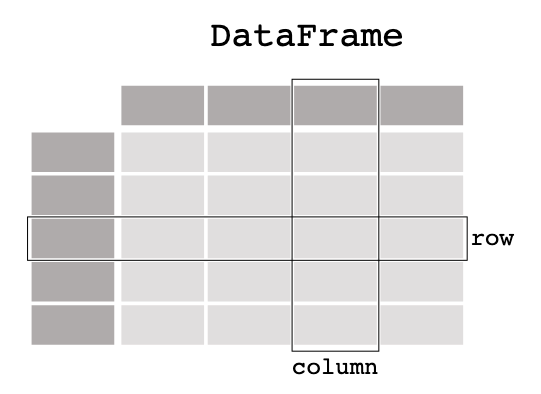

Till skillnad från en NumPy-array kan en DataFrame innehålla olika datatyper, som exempelvis nummer och text, men datan i varje kolumn måste vara av samma typ.

## Skapa en DataFrame

En DataFrame kan läsas in från olika datakällor eller så kan den skapas från grunden. Till exempel kan vi skapa en DataFrame som innehåller information om kemiska föreningar, såsom molekylvikter, kokpunkter och lösligheter:

In [ ]:
import pandas as pd
import numpy as np

data = {
    'Compound': ['Water', 'Ethanol', 'Benzene', 'Methanol', 'Acetone', 'Toluene', 'Tetrachloroethylene'],
    'MolecularWeight': [18.015, 46.07, 78.1134, 32.042, 58.08, 92.14, 165.8],
    'BoilingPoint': [100, 78.37, 80.1, 64.7, 56.08, 110.6, 121.2],
    'Solubility': ['Infinite', 'Miscible', '0.178 g/100 mL', 'Miscible', 'Miscible', 'None', '206 mg/L']
}

df = pd.DataFrame(data)
print(df)

In [ ]:
df

Pandas har även en mycket kraftfull läs-funktion som kan, genom sina många alternativ, även hantera mycket komplicerade filer, till exempel CSV-filer eller Excel-filer. Titta på denna fil på internet "http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat" som mättes vid en storskalig forskningsanläggning. 

Istället för att läsa hela filen så kan vi välja ut vilken data vi vill läsa. Från denna fil vill vi:

1. Ignorera de första 30 raderna ('skiprows').
2. Separera kolumnerna med lika många vita tecken som det finns genom att använda "\s+" som separator. (regular expression)
3. Endast läsa kolumnerna med namnen "Energy" och "PR" som vi räknade till att vara kolumn 2 och 14.
4. Ge dem rätt namn och använda värdena under "Energy" som rad index (index_col=0).

In [ ]:
df_aps=pd.read_csv("http://www.jensuhlig.de/Kemm30/APS_Copper_SolarCell.dat",skiprows=30,sep='\s+',names=['Energy','PR'],index_col=0,usecols=[2,14])
df_aps

In [ ]:
df_aps.plot()

Observera att det även finns en `read_excel` funktion för att läsa excel filer.

Vi återgår nu till vår ursprungliga DataFrame med kemiska föreningar. 

Istället för att skriva ut alla rader så kan vi visa endast de första raderna med `head` (eller de sista genom att använda `tail`):

In [ ]:
df.head() #default 5 rows

In [ ]:
df.head(3)

# Åtkomst och modifiering av data

Precis som med numpy kan vi få åtkomst till formen (d.v.s. antal rader och kolumner) på en DataFrame.

In [ ]:
print(df.shape)

Vi kan också få åtkomst till en lista över kolumn namnen.

In [ ]:
print(df.columns)

För att komma åt data i en DataFrame kan vi använda olika metoder och indexeringsfunktioner. 

De två viktigaste funktionerna för att få åtkomst till data är `.loc`, som tar namnet på rader/kolumner (som i en dictionary):

In [ ]:
df.loc[0,'MolecularWeight'] #rad 0, kolumn 'MolecularWeight'

och `.iloc.`, som istället tar index (som i numpy):

In [ ]:
df.iloc[0,1]

Observera att här är namnen på raderna helt enkelt index, vilket är standard. Men vi kan välja en specifik kolumn att bli namnet på raderna (så som vi gjorde ovan med index_col när vi läste CSV filen):

In [ ]:
df_compound = df.set_index('Compound')
df_compound

In [ ]:
df_compound.loc['Water','MolecularWeight']

`loc` och `iloc` tillåter användning av slicing:

In [ ]:
print(df.loc[:, 'MolecularWeight']) #en kolumn

In [ ]:
print(df.loc[:,['MolecularWeight', 'BoilingPoint']]) #två kolumner

In [ ]:
df.loc[0,:] #en rad

In [ ]:
print(df.iloc[:4, :2])

För att få en specifik kolumn kan vi också använda enklare åtkomst i dictionary-stil:

In [ ]:
print(df['MolecularWeight'])

eller till och med, förutsatt att du använt ett namn utan mellanslag:

In [ ]:
df.MolecularWeight

För att filtrera DataFrame baserat på en given villkor kan du använda boolean-indexering. Låt oss, till exempel, säga att vi vill titta lite närmare på endast större molekyler. För att hitta och välja alla molekyler med en vikt över 50 g/mol och spara dem i en ny DataFrame:

In [ ]:
filtered_df = df[df['MolecularWeight'] > 50]
filtered_df

Om du använder siffror som rad index så kan du också använda slicing för att filtrera. Låt oss skapa en ny DataFrame utifrån tre Gaussian fördelningar:

In [ ]:
x_values = np.arange(-10,10,0.1)
df_function={}
df_function['0'] = np.exp(-x_values**2)
df_function['1'] = np.exp(-(x_values-1)**2)
df_function['2'] = np.exp(-(x_values-2)**2)
df_function = pd.DataFrame(df_function,index=x_values) #använd x som index
df_function

In [ ]:
df_function.loc[-1:1,:]

Observera att detta endast fungerar om raderna är sorterade!

**Övning** Vi har en CSV-fil som innehåller information om alla kemiska element. Vi läsar den och skapar ett "periodic table" DataFrame.

In [ ]:
df_pt = pd.read_csv("ptable.csv")
df_pt.head()

**Uppgift 1** Skriv ut alla element som upptäcktes före år 1850.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Uppgift 2** Vilken element upptäcktes tidigast? **Tips** Använd np.argmin

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**Uppgift 3** Hur många element upptäcktes först i Sverige? (ni kan ignorera de som upptäcktes i två länder).

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Du får hela listan med:

In [ ]:
df_pt[df_pt["discovery_location"].str.contains('Sweden', na=False)]["Element"]

Det finns många sätt att ändra en befintlig DataFrame efter att den har skapats. Du kan till exempel byta namn på rader eller kolumner:

In [ ]:
dg = df.rename(columns={"Compound": "Name"})
dg

Notera att den här funktion returnera en ny DataFrame (som i detta fallet har sparats som `dg`). Originalet finns dock fortfarande kvar:

In [ ]:
df

Om vi vill utföra operationen direkt på plats (i befintlig DataFrame) behöver vi ange `inplace=True`:

In [ ]:
df.rename(columns={"Compound": "Name"}, inplace=True)
df

Du kan lägga till nya kolumner i befintliga DataFrames. Till exempel, för att konvertera kokpunkterna från Celsius till Fahrenheit och lägga till detta som en ny kolumn:

In [ ]:
df['BoilingPoint (°F)'] = df['BoilingPoint']*1.8 + 32
df.head()

Du kan också ta bort rader eller kolumner:

In [ ]:
df.drop(columns = "BoilingPoint (°F)", inplace=True)
df

## Inbyggda analysfunktioner

Du kan få statistisk analys för specifika kolumner:

In [ ]:
print("Medelvärdet för molekylmassa är",df['MolecularWeight'].mean())
print("Standardavvikelsen är", df['MolecularWeight'].std())

För att skriva ut sammanfattande statistik för varje (numerisk) kolumn i DataFrame, använd `describe()`:

In [ ]:
df.describe()

Det är möjligt att sortera DataFrame, till exempel baserat på en specifik kolumn, genom att använda sort_values(). För att sortera föreningarna baserat på deras molekylvikter i stigande ordning:

In [ ]:
sorted_df = df.sort_values('MolecularWeight', ascending=True)
sorted_df

Pandas har också inbyggda matplotlib-funktioner för att snabbt plotta alla eller specifika kolumner. Till exempel:

In [ ]:
fig = df.plot("MolecularWeight", "BoilingPoint", kind="scatter")

Den returnerar matplotlib-figurobjektet, så att vi kan fortsätta att plotta extra saker. Till exempel vi kan plotta tättheten i vår "periodic table" DataFrame och även lägga till linjer mellan de olika perioderna (raderna i det periodiska systemet).

In [ ]:
fig = df_pt.plot("AtomicNumber", "Density")
period = np.array(df_pt["Period"])
for i in np.where(period[:-1] != period[1:])[0]:
    fig.axvline(x = i+1, color = 'r', ls='--')

**Övning** I vår "periodic table" DataFrame, plotta upptäcktsår mot atomnummer. Anpassa kurvan till en linjär funktion. Använd det för att beräkna hur många år det är i genomsnitt mellan två upptäckter av grundämnen.

**Tips** Data innehåller flera NaN-värden (icke-numerisk) vilket kan göra det svårt att hantera. Du kan skapa en dataset utan dessa genom att använda:`df_nona = df_pt.dropna(subset=['Year'])`

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Bonus: RDKit

**Obs!** Man behöver installer RDKit (se [här](https://www.rdkit.org/docs/Install.html))

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
m

In [ ]:
print("Antal atomer:", m.GetNumAtoms())
for atom in m.GetAtoms():
    print(atom.GetSymbol())
print("Antal atomer inkl. väte:", Chem.AddHs(m).GetNumAtoms())
print("Molmass:",Descriptors.MolWt(m),"g/mol")

In [ ]:
from rdkit.Chem import PandasTools

mollist = []
mollist.append(Chem.MolFromSmiles('O'))
mollist.append(Chem.MolFromSmiles('CO'))
mollist.append(Chem.MolFromSmiles('CCO'))
mollist.append(Chem.MolFromSmiles('CC(=O)C'))
mollist.append(Chem.MolFromSmiles('c1ccccc1'))
mollist.append(Chem.MolFromSmiles('c1ccccc1C'))
mollist.append(Chem.MolFromSmiles('ClC(Cl)C(Cl)Cl'))
df['Structure'] = mollist

PandasTools.RenderImagesInAllDataFrames(images=True) #Ibland behövs det för att visas som bild
df